# o1 Mini with baseline prompt

This notebook outlines the steps undertook to generate a prediction using o1 Mini with baseline prompt.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import baseline_instructions
MODEL_ID = "o1-mini-2024-09-12"
SYSTEM_PROMPT = baseline_instructions

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
len(df)

1084

In [3]:
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 5
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 8
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 7
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 49.3 s, sys: 7.84 s, total: 57.2 s
Wall time: 24min 30s


[{'0003.91306_cites_87633.txt': {'model': 'o1-mini-2024-09-12',
   'input_tokens': 842,
   'output_tokens': 1130,
   'prediction': 'yes',
   'confidence': 0.95,
   'rationale': 'The court reiterated the rules from Murray v. Lardner but introduced a qualification stating that these rules have never been applied to matured obligations. This indicates that while the precedent is upheld in general, its application is limited in specific circumstances (i.e., matured obligations), aligning with condition 4 for partial overruling.',
   'raw_results': '```json\n{\n  "overruled": "yes",\n  "confidence": 0.95,\n  "rationale": "The court reiterated the rules from Murray v. Lardner but introduced a qualification stating that these rules have never been applied to matured obligations. This indicates that while the precedent is upheld in general, its application is limited in specific circumstances (i.e., matured obligations), aligning with condition 4 for partial overruling."\n}\n```'}},
 {'0001.91

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0003.91306_cites_87633.txt,o1-mini-2024-09-12,842,1130,yes,0.95,The court reiterated the rules from Murray v. ...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0001.91306_cites_88061.txt,o1-mini-2024-09-12,1597,1269,yes,0.90,The court opinion explicitly states that the o...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
2,0004.91306_cites_88240.txt,o1-mini-2024-09-12,818,1678,no,0.95,"In the provided passage, the case <targetCase>...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0002.91306_cites_88994.txt,o1-mini-2024-09-12,1310,1164,no,0.95,"In both provided passages, the case <targetCas...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0006.91306_cites_88924.txt,o1-mini-2024-09-12,824,755,no,0.95,The passage references the case National Bank ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/6.gpt/6.o1_mini_baseline_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

5

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/6.gpt/6.o1_mini_baseline_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o1-mini-2024-09-12,1597,1269,yes,0.90,The court opinion explicitly states that the o...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o1-mini-2024-09-12,1310,1164,no,0.95,"In both provided passages, the case <targetCas...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o1-mini-2024-09-12,842,1130,yes,0.95,The court reiterated the rules from Murray v. ...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o1-mini-2024-09-12,818,1678,no,0.95,"In the provided passage, the case <targetCase>...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o1-mini-2024-09-12,821,2058,no,0.90,The court in the provided passage references t...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     861
yes    223
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

2101807

In [16]:
eval_df["output_tokens"].sum()

1639308

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.95      0.87      0.91       935
         Yes       0.48      0.71      0.57       149

    accuracy                           0.85      1084
   macro avg       0.71      0.79      0.74      1084
weighted avg       0.88      0.85      0.86      1084



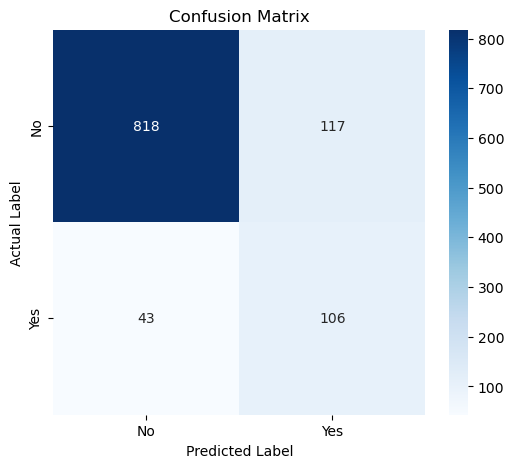

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.85
Precision: 0.48
Recall: 0.71
F-score: 0.57
Specificity: 0.87
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 106
True negatives: 818
False positives: 117
False negatives: 43


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

112

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

40

# Save the evaluation df

In [23]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o1-mini-2024-09-12,1597,1269,yes,0.90,The court opinion explicitly states that the o...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o1-mini-2024-09-12,1310,1164,no,0.95,"In both provided passages, the case <targetCas...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o1-mini-2024-09-12,842,1130,yes,0.95,The court reiterated the rules from Murray v. ...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o1-mini-2024-09-12,818,1678,no,0.95,"In the provided passage, the case <targetCase>...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o1-mini-2024-09-12,821,2058,no,0.90,The court in the provided passage references t...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [24]:
eval_df.to_csv("predictions/6.gpt/6.o1_mini_baseline_prompt_eval.csv", index=False)